# Question 1 (No. of Tokens,Types and TTR)

In [40]:
from nltk.tokenize import TweetTokenizer
import nltk
import string
import sys
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from nltk.corpus import wordnet
import math
import random


punc1 = string.punctuation
punc = []
for i in punc1:
    punc.append(i)

#print(punc, len(punc))
#print("Default encoding is .. ",sys.getdefaultencoding())

file = open('/Users/anubhavjain/Desktop/Anubhav_MacBook_Pro/Natural Language Processing/NLP_2/tweets-dataset.csv', "r", encoding="utf-8")

tknr = TweetTokenizer(strip_handles=True)
sum = 0
count_punc = 0
arr = []

heap_tok = []
heap_voc = []
c_tok = 0
c_voc = 0
s_voc = set()

for i in file:
    a = tknr.tokenize(i)
    b = []
    for j in a:
        if(re.match(r"\.[\s.]*\.",j)):
            count_punc+=1
        elif(j in punc):
            count_punc+=1
        elif(re.match(r"https:\/\/\S*|pic.twitter\S*",j)):
            count_punc+=1
        else:
            arr.append(j)
            b.append(j)
            s_voc.add(j)

    c_tok+=len(b)
    c_voc= len(s_voc)
    heap_tok.append(c_tok)
    heap_voc.append(c_voc)
    sum+=len(a)

no_tokens = len(arr)
print("No. of tokens ", no_tokens)

type_arr = np.unique(arr)
no_type = len(type_arr)

print("No. of Types", no_type)
print("TTR",no_type/no_tokens)


No. of tokens  305672
No. of Types 43853
TTR 0.14346423617472323


# Question 2 (Zipf's Law for Length and Frequency Graph)

Length = 9.132130272878975 * 1 / Frequency


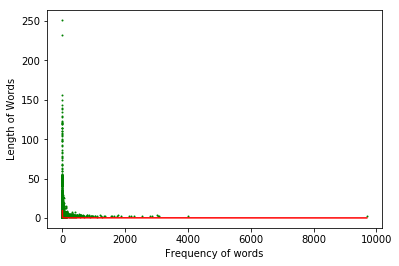

In [60]:
def test_zipf1(n,k):
    return k*(1/n)

frequency_dist = nltk.FreqDist(arr)
result = dict()

length_arr = []
freq_arr = []

for word, frequency in frequency_dist.most_common(50000):
            result[word] = frequency
            length_arr.append(len(word))
            freq_arr.append(frequency)

param1, param_cov1 = curve_fit(test_zipf1, freq_arr, length_arr)
print("Length = "+ str(param1[0]) + " * 1 / Frequency")
ans = param1[0]/freq_arr

plt.scatter(freq_arr,length_arr,s=1, color ='green')
plt.plot(freq_arr,ans, '-', color='red')
plt.xlabel("Frequency of words")
plt.ylabel("Length of Words")
plt.show()

# Question 2 (Zipf's Law for Meaning and Frequency Graph)

Meaning = 0.8927070978386349 * Sqrt(Frequency)


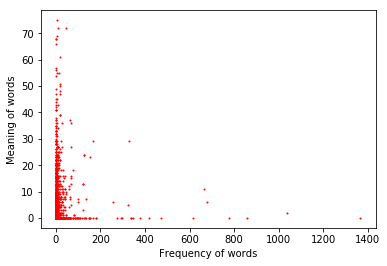

In [67]:
def test_zipf2(n,k):
    return k*np.sqrt(n)

random_words = [type_arr[random.randrange(no_type)]for i in range(5000)]
#print(random_words)

#rand_words = ["India"]
words_mean = []
freq_words = []

for i in random_words:
    synonyms = []
    for syn in wordnet.synsets(i):
        for l in syn.lemmas():
            synonyms.append(l.name())
    l = len(set(synonyms))
    words_mean.append(l)
    freq_words.append(result[i])

param2, param_cov2 = curve_fit(test_zipf2, freq_words, words_mean)
print("Meaning = "+ str(param2[0]) + " * Sqrt(Frequency)")
ans1 = param2[0]*np.sqrt(freq_words)

plt.scatter(freq_words,words_mean,s=1, color ='red')
#plt.plot(freq_words,ans1,color="green")
plt.xlabel("Frequency of words")
plt.ylabel("Meaning of words")
plt.show()

# Question 3 (Heap's Law)

V = 10.887305419830385*(N^0.657968907783682)
10.887305419830385 0.657968907783682


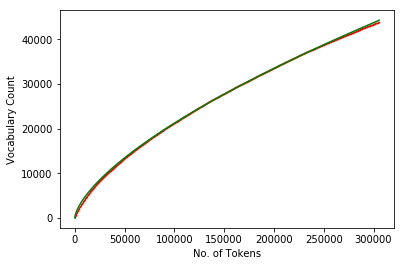

In [71]:
def test(n, k, beta):
    return k * np.power(n, beta)

param, param_cov = curve_fit(test, heap_tok, heap_voc)

K = param[0]
beta = param[1]
print("V = " +str(K)+"*(N^"+str(beta)+")")
print(K,beta)

plt.scatter(heap_tok,heap_voc,s=0.001,color ='red')
plt.plot(heap_tok,K*np.power(heap_tok,beta), color='green')
plt.xlabel("No. of Tokens")
plt.ylabel("Vocabulary Count")
plt.show()